# COGS 118A - Final Project

# Alzheimer's Classification Using MRI Image Data

# Group Members

- Antara Sengupta
- Ryan Harsono
- Alyssa Fleschner
- Josue Sanchez

# Abstract 
In this project, our goal is to build a model that can predict the stage of Alzheimer’s disease within an individual based upon MRI scan images. In the specific dataset that we are working with, there are 4 levels of severity that are presented: none, very mild, mild, and moderate. This dataset also provides us with both the original and augmented images of the scans. The MRI scans are separated into 4 sets based upon severity, and we will use a set of these images and their respective classifications to train our model, and then test our model with the images we set aside to use as our testing data. We also may use methods like cross-validation to increase accuracy, but due to the large size of our data set, we may only use a subset of the data in our model development process. Our objective is to develop an algorithm that can gauge the severity of Alzheimer’s disease within a patient using their MRI scan, and we will use our chosen database to train and test our model, and test performance and predictive accuracy through methods such as confusion matrices, AUC-ROC and others that we find fit.


# Background
Alzheimer's disease is a neurodegenerative disorder that causes memory loss, loss of cognitive abilities and change in behavior. Magnetic Resonance Imagining (MRI’s) is an imaging technique utilized to visualize internal parts of the brain. MRI’s detect the abnormalities in the brain that are associated with diagnosing Alzheimer’s disease. With our study patients experiencing Alzheimer’s disease, their cortical thickness diminishes as well as the hippocampus breaking down which can deteriorate rapidly with age. Typically, we see this degeneration process in ages 60 and above, however, there are cases of Alzheimer’s starting in a person’s 30’s. With our dataset on Kaggle</a>[<sup>[1]</sup>](#reference_1), we aim to explore how image segmentation and advanced processing techniques can detect early onset symptoms, identify significant discrepancies through brain image processing, and monitor the progression of the disease. With our model, images of MRI scans will be trained and tested to help improve accuracy and prevent overfitting of our different stages of Alzheimer’s. We aim to determine different levels of Alzheimer's disease through image classification of MRI scans. Other models </a>[<sup>[2]</sup>](#reference_2) extract relevant features from the MRI scans with dementia patients and utilized metrics, such as, ROC-AUC to differentiate between healthy or not. Deep learning models contribute to the idea of medical analysis with image processing and can create a change in how we approach neurological diseases. Our study aims to utilize deep learning models with advanced image processing in order to detect early onset symptoms of Alzheimer's. In efforts to improve medical image analysis and lead to a better diagnosis plus identifying where patients need help. From the Debugger Cafe, </a>[<sup>[3]</sup>](#reference_3) our Alzheimers disease model can relate to how they are utilizing brain MRI classification using PyTorch EfficientNetB0. The idea is to implement the EfficientNetB0 to classify and conclude MRI scans for Alzheimers detection. We also included PyImageSearch, </a>[<sup>[4]</sup>](#reference_4), to focus our convolutional neural network models (CNN) on developing image classification for Alzheimers. 

# Problem Statement
The problem that we will be tackling in the duration of this project is the determination and diagnosis of levels of Alzheimer’s disease within patients by using image classification of their MRI scans. Our objective is to develop a model that will be able to identify whether a given individual has none, very mild, mild or moderate levels of dementia based upon their MRI scan. We will use image data from our chosen database to train and test our model. Some of the metrics and techniques we may use in our model development are feature extraction and feature engineering, KNN and decision tree algorithms to assist us with classification tasks, and cross-validation, ROC-AUC and correlation matrices to analyze the accuracy and predictive validity of our model. In the feature engineering process, we may opt for methods such as PCA to create feature vectors which we could then proceed to use other techniques on to propel our classification algorithm. In this project, we are dealing explicitly with classifying images based on four specific classifications: (1) none, (2) very mild, (3) mild, and (4) moderate. We will not be dealing with any subjectivity in diagnosis or any gray area that lies outside of these four specific classifications that have been provided to us by our dataset. The dataset we have chosen is extremely large, having over forty-thousand images, and although we may not use all the data for this project in the sake of efficiency, time and complexity, we will still have a very large dataset to work with which inherently has benefits in aspects such as reproducibility. By having our project focus on classifying images into four specific categories, we ensure the quantifiable nature of our problem, while also establishing the measurability by utilizing various techniques and metrics to approach our problem that has been taught to us throughout the quarter.

# Setup

In [1]:
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

# Data 

The dataset used in this project is sourced from Kaggle </a>[<sup>[1]</sup>](#reference_1)  and comprises MRI scans and associated data. The dataset consists of images categorized into four classes: Non Demented, Very Demented, Very Mild Demented, and Moderately Demented. These images are obtained from two folders, one containing an original dataset and the other containing augmented data. 

The dataset used for this project consisted of 33,984 observations with 2 variables. The variables in the dataset were the image and the corresponding label. The critical variable would be the second column as it is the labels we will need to predict and train our data with supervised learning.
    
We did not engage in too many steps regarding data cleaning as our project dealt with the realm of image classification and we felt as though majority of the data cleaning steps that we have learned so far were not extremely applicable or appropriate in this case. 

In [ ]:
#Entering data and gathering different sizes to run in a for loop
data_dir = '/Users/josuesanchez/Documents/Alzhiemer Dataset/AugmentedAlzheimerDataset_train'
data_dir_test = '/Users/josuesanchez/Documents/Alzhiemer Dataset/AugmentedAlzheimerDataset_test'
img_width, img_height = 150, 150
epochs_list = [10, 25, 50, 100]
batch_sizes = [10, 20, 30, 40]
history_dict = {}

# Proposed Solution

Since our goal is to perform image classification, we will implement a variety of neural networks using the libraries that can be found with python, which is designed for computer vision and image processing tasks. While libraries provides many classification models, we are specifically interested in the most popular ones, which include: TensorFlow Sequential EfficientNet GoogLeNet ResNet VGG These were selected from a combination of sources[2][3][4]. Each of the above neural networks were revolutionary in their time and have been proven to perform well when processing images. We would also like to compare their performances to a simple convolutional neural network with minimal layers. All of the models models will be implemented on the train/test splits we determine for our dataset, and their performances will be measured using a standardized loss function.

**Conv2D**
Conv2D was chosen because it works well on images due to the fact that the input and output data are three-dimensional. It is a linear operation that shifts a filter, or kernel, of a certain size to perform element-wise multiplication on the data being examined by the kernel. Each stride of the convolution, meaning each shift of the kernel on the image data, which can also be specified, results in a single output pixel, so the entire convolution process of an image input results in an entirely new image output with the purpose of extracting high-level features from the original image. Convolution layers are an extremely common and core component of convolutional neural networks. 

**ReLU Activation Function**
We chose to follow each convolution layer with an activation function in order to add non-linearity to the model. Introducing non-linearity allows our network to model more complex relationships and make it more adaptable to a wide range of image features. Specifically, we chose the Rectified Linear Unit, more commonly known as ReLU, because it mimics the intuition of a linear function but allows for bends that can accommodate changes in gradient steps well. ReLU does not saturate nor does it suffer from the problem of a vanishing gradient towards the extremes of input. Additionally, ReLU is known to be computationally efficient and converges faster than other activation functions, such as tanh. 

**MaxPooling2D**
Pooling, with MaxPooling2D in particular, reduces the width and height dimensions of an image in a process called downscaling while retaining the most significant features of the image. This compressed representation of the image allows us to control the dimensionality sizes of our data as we process them through the network, and prevents overfitting by discarding less relevant data. Additionally, the action of pooling creates an invariance of the data, meaning that it blurs the data to an extent in order to better learn general patterns within the image data. Additionally, because the act of pooling reduces the dimensions of the images, it helps to increase the computational efficiency and memory required while running the network. 

**Flatten**
The Flatten layer simply transforms two-dimensional feature maps to one-dimensional vectors. It essentially serves to prepare the input data to conform to the input data requirement of a one-dimensional shape for a Dense layer. 

**Dense**
The Dense layer, or a deeply connected layer, is a layer in which each neuron takes in input from every neuron in the previous layer. It then transforms the input data into a vector of a dimension specified by the user through matrix-vector multiplication, effectively changing its dimensions. Dense layers are often used to classify images that have been processed through convolutional layers, which is important for our project purpose since our goal is to classify images of MRI data into four classes. Because of their use in classification, Dense layers are traditionally used toward the later stages of neural networks. 

**Dropout**
Dropout layers are an effective regularization method to prevent overfitting and introduce more generalization of our network on the image data. Dropout works by randomly setting some neurons to 0, or dropping those neurons out, in the forward pass. This introduces redundant representations of the data to ensure all neurons are non-trivial, thus making each neuron more robust. When it comes to neural networks and relatively small datasets, overfitting is a major issue since networks can often be rendered unproductive beyond practice, which is why regularization is essential. 

**Softmax Activation Function**
Activation functions add non-linearity to our neural network, which allow our network to model more complex relationships across varying image feature data. While we used ReLU to follow each convolution layer, the purpose of softmax is more specific as a multi-class classifier. Because of its particular purpose, softmax is almost always used at the very end of the network. It works by transforming the output of the rest of the neural network into a probability distribution over the number of classes in which we’d like to classify our original input images. In essence, the result of softmax estimates the probability of a given input image to be in each class, from a normalized range between 0 and 1. 

**Order of Layers**
We decided to build our neural network using the Sequential class in Keras to fully customize our network, as well as our awareness of its effectiveness in creating simple neural networks that take in a single set of input data and produce a single set of output. Based on what we knew about the different types of layers from our literature review, we realized it could potentially be effective, if not at least interesting, to construct groups of convolution, activation function, and pooling layers. Initially, we started with one group, then two groups, then three groups of these three different layers before being satisfied with the tradeoff between computational complexity and accuracy. In order to accommodate the multi-class classification aspect of our problem, we then added various Flatten, Dense, and activation layers to support our use of the softmax activation function at the end of the network. We also realized the functionality of the Dropout regularization method to prevent overfitting, so we followed the Dense layer with a Dropout layer, as is commonly performed in practice. 


In [7]:
#Creating the model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4))  # 4 classes: MildDemented, ModerateDemented, NonDemented, VeryMildDemented
    model.add(Activation('softmax'))
    
    return model

#rescaling the data of the images 
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#run the foor loop as many times are the size of batch and epoch
for epochs in epochs_list:
    for batch_size in batch_sizes:
        train_generator = datagen.flow_from_directory(
            data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical',
            subset='training')

        validation_generator = datagen.flow_from_directory(
            data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical',
            subset='validation')
        
        test_generator = datagen.flow_from_directory(
            data_dir_test,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical', 
            shuffle=False)

        model = create_model()

        #compiling the model
        model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

        #creating an early stop, this might underfit the data but best practice to prevent to much runtime
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)

        print(f"Training model with batch size={batch_size} and epochs={epochs}")
        history = model.fit(
            train_generator,
            epochs=epochs,
            validation_data=validation_generator,
            callbacks=[early_stopping])
        
        print("Evaluating on test set")
        test_loss, test_acc = model.evaluate(test_generator)
        print(f"Test loss: {test_loss}, test accuracy: {test_acc}")
        
        #Gathering the history of the epoch and batch into a dictionary which will later be turned into a DF
        history_dict[(epochs, batch_size)] = history.history

Found 18493 images belonging to 4 classes.
Found 4621 images belonging to 4 classes.
Found 10870 images belonging to 4 classes.
Training model with batch size=10 and epochs=10
Epoch 1/10
1850/1850 [==============================] - 123s 66ms/step - loss: 1.0799 - accuracy: 0.4920 - val_loss: 0.7328 - val_accuracy: 0.6587
Epoch 2/10
1850/1850 [==============================] - 126s 68ms/step - loss: 0.8139 - accuracy: 0.6310 - val_loss: 0.6151 - val_accuracy: 0.7232
Epoch 3/10
1850/1850 [==============================] - 133s 72ms/step - loss: 0.7469 - accuracy: 0.6630 - val_loss: 0.6201 - val_accuracy: 0.7291
Epoch 4/10
1850/1850 [==============================] - 135s 73ms/step - loss: 0.7121 - accuracy: 0.6919 - val_loss: 0.6502 - val_accuracy: 0.7301
Epoch 5/10
1850/1850 [==============================] - 128s 69ms/step - loss: 0.7008 - accuracy: 0.7031 - val_loss: 0.6249 - val_accuracy: 0.7211
Epoch 6/10
1850/1850 [==============================] - 127s 69ms/step - loss: 0.7123 - a

Epoch 6/25
1850/1850 [==============================] - 132s 71ms/step - loss: 0.6973 - accuracy: 0.7198 - val_loss: 0.5953 - val_accuracy: 0.7423
Epoch 7/25
1850/1850 [==============================] - 132s 71ms/step - loss: 0.6973 - accuracy: 0.7227 - val_loss: 0.7155 - val_accuracy: 0.7379
Epoch 8/25
1850/1850 [==============================] - 132s 71ms/step - loss: 0.7266 - accuracy: 0.7160 - val_loss: 0.6103 - val_accuracy: 0.7591
Epoch 9/25
1850/1850 [==============================] - 133s 72ms/step - loss: 0.7698 - accuracy: 0.7093 - val_loss: 0.6628 - val_accuracy: 0.7234
Epoch 10/25
1850/1850 [==============================] - 135s 73ms/step - loss: 0.7821 - accuracy: 0.7026 - val_loss: 0.6850 - val_accuracy: 0.7206
Epoch 11/25
1850/1850 [==============================] - 137s 74ms/step - loss: 0.7913 - accuracy: 0.6996 - val_loss: 0.7594 - val_accuracy: 0.7256
Epoch 12/25
1850/1850 [==============================] - 133s 72ms/step - loss: 0.8149 - accuracy: 0.6930 - val_loss

617/617 [==============================] - 110s 178ms/step - loss: 0.4420 - accuracy: 0.8347 - val_loss: 0.4009 - val_accuracy: 0.8572
Epoch 22: early stopping
Evaluating on test set
363/363 [==============================] - 17s 48ms/step - loss: 0.3881 - accuracy: 0.8510
Test loss: 0.388082891702652, test accuracy: 0.8509659767150879
Found 18493 images belonging to 4 classes.
Found 4621 images belonging to 4 classes.
Found 10870 images belonging to 4 classes.
Training model with batch size=40 and epochs=25
Epoch 1/25
463/463 [==============================] - 109s 234ms/step - loss: 1.1246 - accuracy: 0.4735 - val_loss: 0.7885 - val_accuracy: 0.6529
Epoch 2/25
463/463 [==============================] - 108s 234ms/step - loss: 0.8117 - accuracy: 0.6163 - val_loss: 0.6636 - val_accuracy: 0.7100
Epoch 3/25
463/463 [==============================] - 110s 237ms/step - loss: 0.6968 - accuracy: 0.6772 - val_loss: 0.5636 - val_accuracy: 0.7457
Epoch 4/25
463/463 [============================

Epoch 13: early stopping
Evaluating on test set
544/544 [==============================] - 22s 40ms/step - loss: 0.4384 - accuracy: 0.8343
Test loss: 0.43840011954307556, test accuracy: 0.8343146443367004
Found 18493 images belonging to 4 classes.
Found 4621 images belonging to 4 classes.
Found 10870 images belonging to 4 classes.
Training model with batch size=30 and epochs=50
Epoch 1/50
617/617 [==============================] - 131s 212ms/step - loss: 1.0438 - accuracy: 0.5151 - val_loss: 0.7067 - val_accuracy: 0.6923
Epoch 2/50
617/617 [==============================] - 133s 215ms/step - loss: 0.7329 - accuracy: 0.6678 - val_loss: 0.5745 - val_accuracy: 0.7485
Epoch 3/50
617/617 [==============================] - 131s 212ms/step - loss: 0.6102 - accuracy: 0.7333 - val_loss: 0.4709 - val_accuracy: 0.8059
Epoch 4/50
617/617 [==============================] - 132s 213ms/step - loss: 0.5279 - accuracy: 0.7738 - val_loss: 0.6486 - val_accuracy: 0.7221
Epoch 5/50
617/617 [===============

In [9]:
#Save model to not run algorithm again
model.save('alzheimer_model_V3.keras')

In [10]:
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_80 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 activation_81 (Activation)  (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                               

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


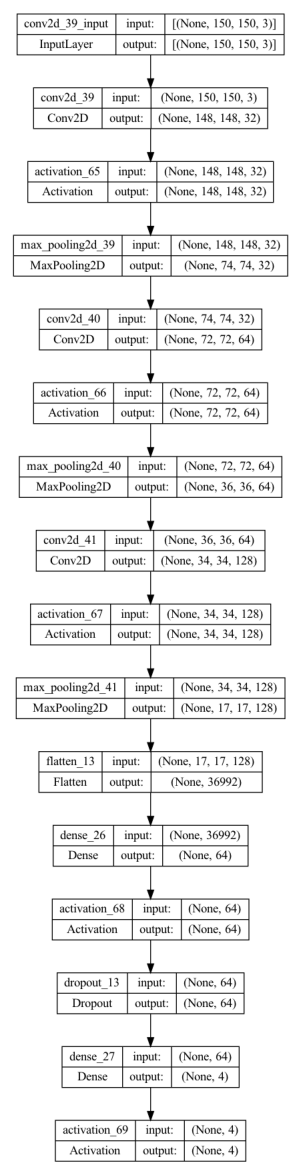

In [132]:
#plotting the model to show its input layers and parameters
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot.png')
img = plt.imread('model_plot.png')

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)
ax.axis('off')
plt.show()

# Evaluation Metrics

To measure the accuracy of our models, we plan to simply compare the predicted labels and the actual labels of our classifications. We then plan to produce accuracy percentages for each of the four classes in our dataset. Additionally, we plan to compare the losses of each model using cross entropy loss, a common neural network metric that measures the performance of classification models. The ideal model would have high accuracy and low loss.

We chose to use the metric of cross-entropy loss, because it is a good metric for measuring  the performance of a classification model, as it does so based on probability and error. Essentially, the larger the probability of something, the lower the cross entroy, and vice versa. 

Formula for Cross-Entropy: $$H(p, q) = - \sum_{i} p(i) \log(q(i))$$

We also used the RMS-Prop as our optimizer in our model, as it accelerates the optimization process,which could make our model more efficient and provide stronger/better results. 

Formula for RMS-Prop: $$w_{t+1} = w_t - \frac{\eta}{\sqrt{v_t + \epsilon}} \odot g_t$$

Additionally, we will be creating a confusion matrix to evaluate the performance of our model, and calculate metrics like precision, recall and accuracy using our confusion matrix. It is important to create a confusion matrix and calculate these metrics for our project especially, because it is a classification task. 
$$\text{Precision} = \frac{TP}{TP + FP}$$
$$\text{Recall} = \frac{TP}{TP + FN}$$
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

# Results

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [43]:
#Converting the history dictionary into a DF to plot
history_dfs = []

for (epochs, batch_size), history in history_dict.items():
    df = pd.DataFrame(history)
    df['epochs'] = epochs
    df['batch_size'] = batch_size
    history_dfs.append(df)

full_history_df = pd.concat(history_dfs, ignore_index=True)
max_val_acc_index = full_history_df['val_accuracy'].idxmax()
best_row = full_history_df.loc[max_val_acc_index]
print(best_row)

loss             0.390100
accuracy         0.855945
val_loss         0.328670
val_accuracy     0.879680
epochs          10.000000
batch_size      40.000000
Name: 38, dtype: float64


We decided to start off with visualizing the accuracy of all the models, just to get an idea of what we are working with, and also to begin to compare models in order to narrow down our focus and choose the optimal ones. 

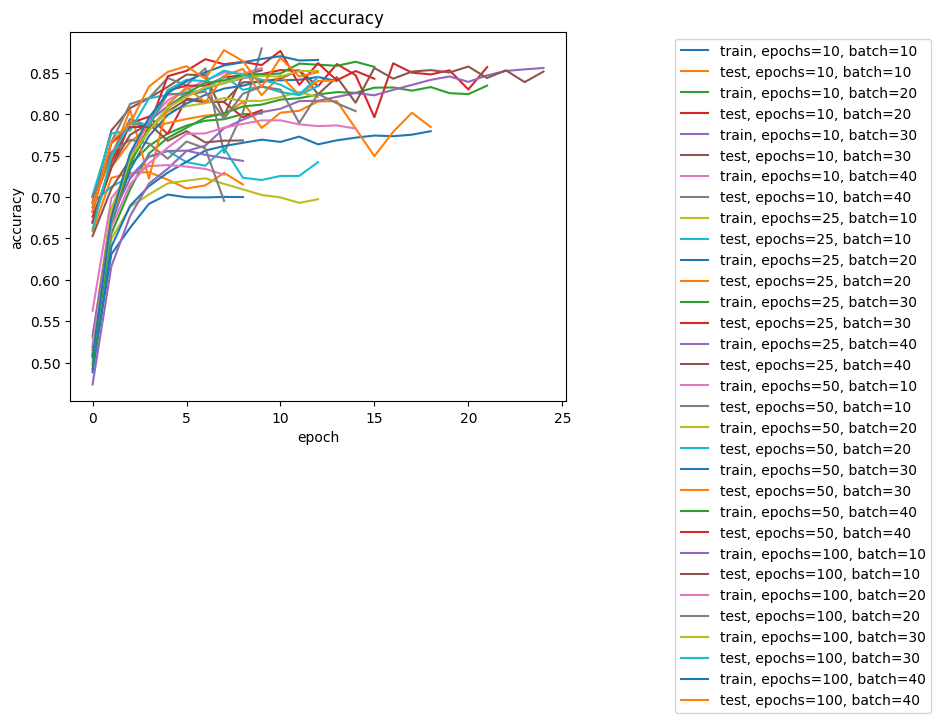

In [51]:
#Plotting the total accuracy of all models with their respected train and test
for (epochs, batch_size), history in history_dict.items():
    plt.plot(history['accuracy'], label=f"train, epochs={epochs}, batch={batch_size}")
    plt.plot(history['val_accuracy'], label=f"test, epochs={epochs}, batch={batch_size}")

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right', bbox_to_anchor=(1.75,1))
plt.show()

We initially plotted the accuracy of all models by considering different combinations of batch sizes (ranging from 10 to 40 with increments of 10) and epochs (10, 25, 50, 100). This allowed us to observe the accuracy performance of each train/test set combination. The resulting graph provides an overview of the accuracy trend across different model configurations.


Next, we are going to select the top 3 most accurate models and proceed to visualize them, and continue on with figuring out the most optimal and accurate model for our comparison task. Below, we plot our model and observe the train and test accuracies and how they compare to one another and see which models are performing well, and which ones aren't. 

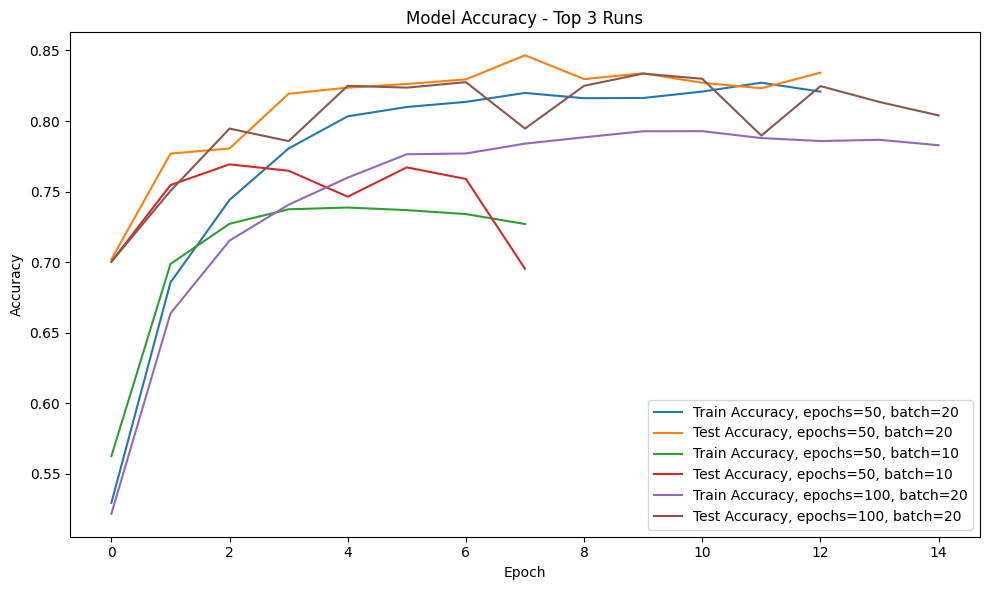

In [151]:
#Gathering the top 3 only and plotting them
top_3_accuracy = sorted(history_dict.items(), key=lambda x: x[1]['val_accuracy'], reverse=True)[:3]

plt.figure(figsize=(10, 6))
for (epochs, batch_size), history in top_3_accuracy:
    plt.plot(history['accuracy'], label=f"Train Accuracy, epochs={epochs}, batch={batch_size}")
    plt.plot(history['val_accuracy'], label=f"Test Accuracy, epochs={epochs}, batch={batch_size}")

plt.title('Model Accuracy - Top 3 Runs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

The above graph indicates the top 3 train/test epochs and batch sizes. We have the best training/testing accuracy at epochs equal to 10,50, 100 with batch size 10, 20, and 40. By analyzing the accuracy curves across the various epochs and batch sizes we can visualize the possibilities of over/under fitting our loss accuracy. 

Now we will go ahead and switch gears, and look at the same models but from a different perspective - instead of accuracy, we will visualize and study the loss. We find it important to study both accuracy and loss because they provide different perspectives and information regarding a model's performance, as accuracy provides a crucial performance metric, while loss is important regarding the optimization process. 

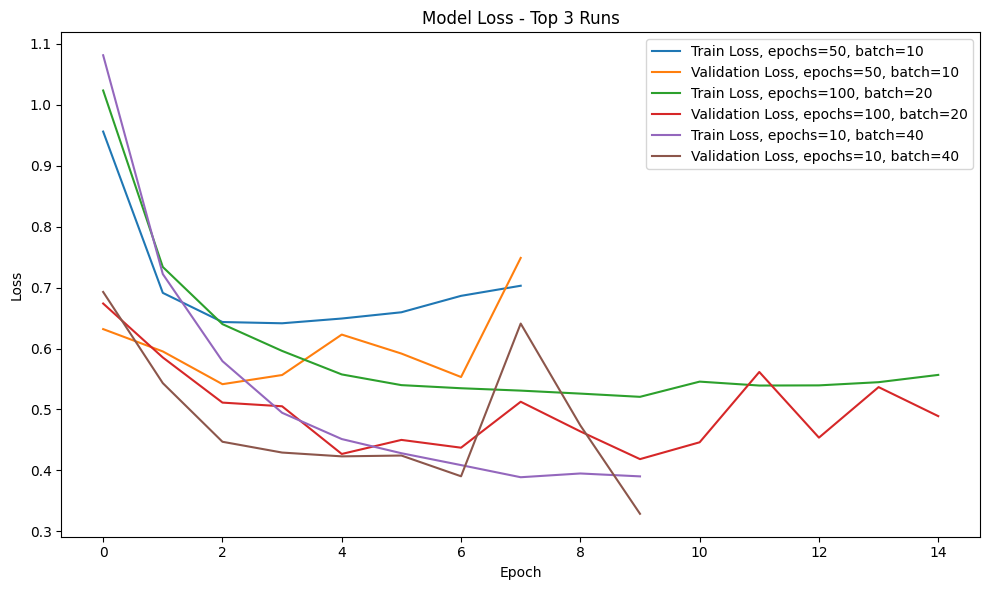

In [152]:
#Gathering the top 3 only and plotting them, using the previous code and only changing for a model loss
top_3_loss = sorted(history_dict.items(), key=lambda x: x[1]['val_loss'], reverse=False)[:3]

plt.figure(figsize=(10, 6))
for (epochs, batch_size), history in top_3_loss:
    plt.plot(history['loss'], label=f"Train Loss, epochs={epochs}, batch={batch_size}")
    plt.plot(history['val_loss'], label=f"Validation Loss, epochs={epochs}, batch={batch_size}")

plt.title('Model Loss - Top 3 Runs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Our final graph above indicates training loss accuracy and validation loss.We determine that batch size equal to 40 is the most accurate. Respectively, epochs equivalent to 10, 100 and 50 are the most accurate. Our top 3 loss curves show the lowest validation loss and we can visualize the comparison without other training/test accuracies crowding. 

In [75]:
sorted_df = full_history_df.sort_values('val_accuracy', ascending=False)
top_3 = sorted_df.head(3)
print(top_3)

         loss  accuracy  val_loss  val_accuracy  epochs  batch_size
38   0.390100  0.855945  0.328670      0.879680      10          40
213  0.362613  0.859190  0.346966      0.877732     100          40
163  0.382507  0.849402  0.339636      0.876650      50          40


In [154]:
#Using the best epoch size and batch found to run a new model and 
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=40,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=40,
    class_mode='categorical',
    subset='validation')

v1_model = create_model()

v1_model.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

print(f"Training model with batch size= 40 and epochs= 10")
history = v1_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

print("Evaluating on test set")
test_loss, test_acc = v1_model.evaluate(test_generator)
print(f"Test loss: {test_loss}, test accuracy: {test_acc}")

Found 18493 images belonging to 4 classes.
Found 4621 images belonging to 4 classes.
Training model with batch size= 40 and epochs= 10
Epoch 1/10
463/463 [==============================] - 109s 235ms/step - loss: 1.0895 - accuracy: 0.4877 - val_loss: 0.8325 - val_accuracy: 0.6347
Epoch 2/10
463/463 [==============================] - 107s 232ms/step - loss: 0.7494 - accuracy: 0.6610 - val_loss: 0.6211 - val_accuracy: 0.7475
Epoch 3/10
463/463 [==============================] - 106s 230ms/step - loss: 0.6047 - accuracy: 0.7349 - val_loss: 0.4658 - val_accuracy: 0.8122
Epoch 4/10
463/463 [==============================] - 106s 229ms/step - loss: 0.5124 - accuracy: 0.7861 - val_loss: 0.4158 - val_accuracy: 0.8319
Epoch 5/10
463/463 [==============================] - 106s 230ms/step - loss: 0.4598 - accuracy: 0.8120 - val_loss: 0.4295 - val_accuracy: 0.8325
Epoch 6/10
463/463 [==============================] - 106s 230ms/step - loss: 0.4284 - accuracy: 0.8269 - val_loss: 0.4092 - val_accura

In [155]:
v1_model.save('Final_V_model.keras')

Now we will evaluate our model's performance by creating and analyzing a confusion matrix. Let us see if our model is actually doing a good job. 

271/271 [==============================] - 17s 64ms/step


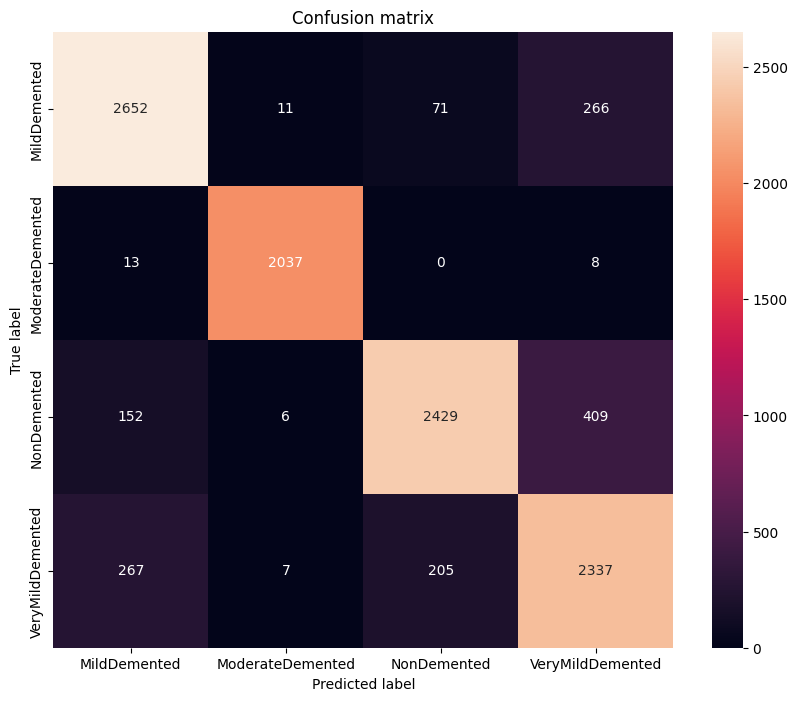

In [156]:
#plotting the confusion matrix to show results using the prediction
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
y_pred = np.argmax(predictions, axis=1)

y_true = test_generator.classes
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = list(test_generator.class_indices.keys())

confusion_mat_df = pd.DataFrame(confusion_mat, index = class_labels, columns = class_labels)
#model printed out using a confusion heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mat_df, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

As seen in the above confusion matrix, our model is performing quite well. We can see that our predictions are in the optimal range of accuracy for all four of the criteria. We can see here that our model is has a very high accuracy rate, with majority of the images being predicted/classified correctly. Our classification categories are [Non-Demented, Very Mild Demented, Mild Demented, Moderate Demented], with the severity of Alzheimer's being the lowest at Non-Demented (no existence of the disease) to the highest at Moderate (existence and quite progression of the disease). Therefore you can see, even where our model makes its errors in classification, the errors aren't very far off - meaning that even when it classifies something incorrectly, it will classify it to the closest level of severity to its true class. For example, the model predicts majority of the Non-Demented MRI images as Non-Demented (2429/2705 of the Non-Demented predictions were correctly predicted), but the second most common actual value that the algorithm predicted as "Non-Demented" was "Very Mild Demented", which is the closest to Non-Demented in the severity scale. On the other hand, there were 0 predictions which classified a Mpderate Demented image as Non-Demented. Similarly. if we look at Moderate Demented predictions, 2037/2061 images that were predicted as Moderate Demented were actually Moderate Demented (98% correct!), the next most common actual classification predicted as Moderate Demented was Mild Demented (11/2061), which is the next closest in severity to Moderate Demented.

All in all, you will see this pattern existing all throughout the matrix, where essentially most of our predictions are accurate, and even if they are incorrect, they are not far-off in terms of severity compared to the true class. Since we are working with biological data here, there can be a lot of small imperfections and inconsistencies within images, as diseases and such manifest different within different people, as biology is unique. Our model however picks up on these differences that inherently exist within human biology, so the incorrect prediction are in large part due to the pure uniqueness in disease manifestation, but our model's level of inaccuracy even within errors is quite low, meaning it is not going to predict a Non-Alzheimer's patient as Moderately Demented. Given this information, we are pretty confident in the capabilities of our model, as discuss this further in our final section.

Our average recall is 87.86125%, average precision is 88.00225% and average accuracy is 86.983%.

1/1 [==============================] - 0s 12ms/step


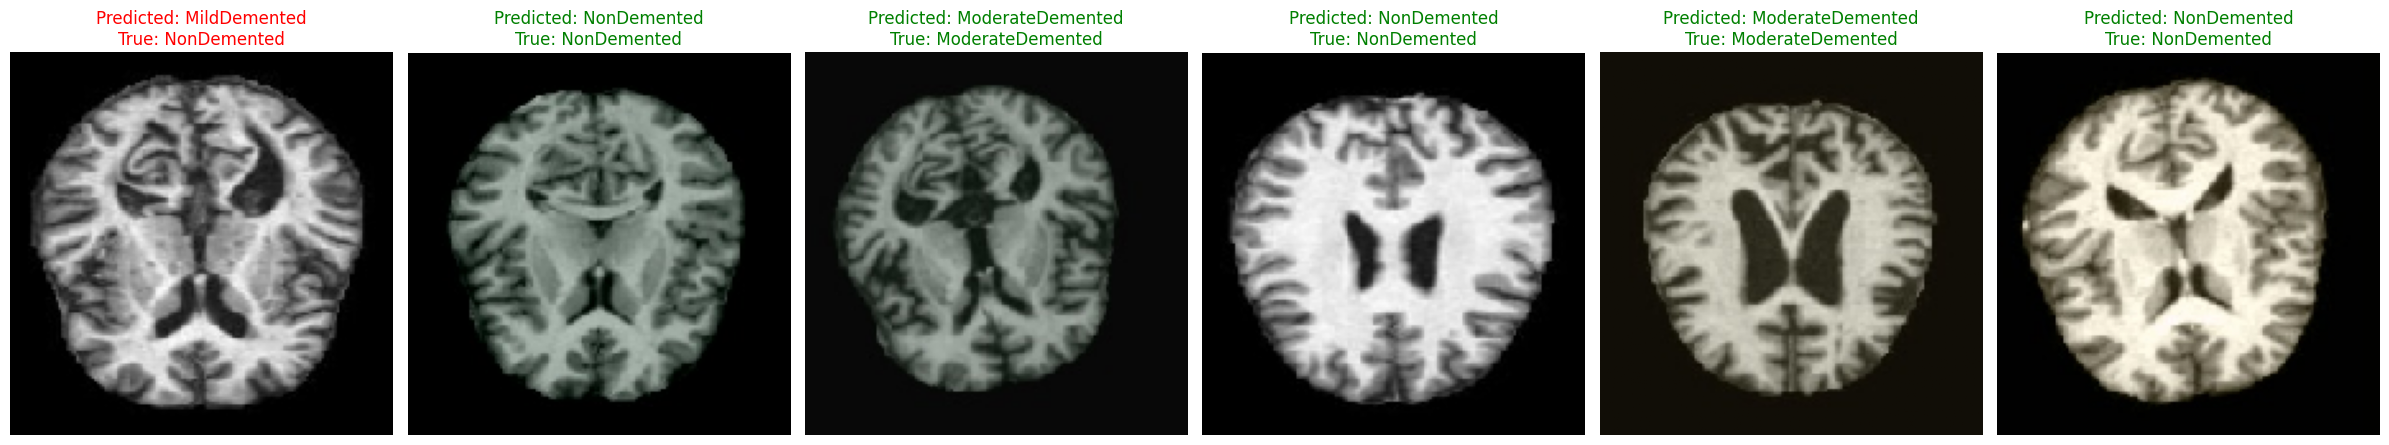

In [169]:
#load model and place directory into it
model = tf.keras.models.load_model('Final_V_model.keras', compile=False)
test_dir = '/Users/josuesanchez/Documents/Alzhiemer Dataset/AugmentedAlzheimerDataset_test'
num_samples = 6
random_photo = np.random.choice(photo_filenames, size=num_samples, replace=False)
fig, axes = plt.subplots(ncols=num_samples, figsize=(4*num_samples, 6))

#loop into the images and size them correctly 
for i, filename in enumerate(random_photo):
    img = tf.keras.preprocessing.image.load_img(filename, target_size=(img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
#predicting the model and printing out the images and showing their predicted label
    prediction = model.predict(img)
    predicted_label = class_labels[np.argmax(prediction)]
    true_label = class_labels[test_generator.class_indices[os.path.basename(os.path.dirname(filename))]]
    label_color = 'green' if predicted_label == true_label else 'red'
    axes[i].imshow(img[0])
    axes[i].axis('off')
    axes[i].set_title(f"Predicted: {predicted_label}\nTrue: {true_label}", color=label_color)

plt.tight_layout()
plt.show()

In our final results, we produce a sample of how our dataset would run in the model. For each randomly selected image, the code loads and preprocesses the image using tf.keras.preprocessing.image.load_img and .img_to_array functions which indicate how we loaded the model then normalized the prediction class. We then find the classification of the image with the highest probability and map the corresponding label.  

In our example, we sampled 6 photos to classify and our model predicted 5 / 6 correct. This indicates an accuracy level that we expected.


# Discussion
## Interpreting the result

Based on our exploration and results above, we can see that our model performed quite well in this image classification task, with an accuracy of 87.9%. Going into this project, we expected our model to do slightly better than random, which is around 60%. Due to the high level of accuracy achieved by our model, our main takeaway is that image classification can be a powerful tool in biomedical research, and can be useful in exploring areas that are still highly unknown to this day, such as the human brain. We believe that future models accomplishing similar goals can make a signficant difference in Alzheimer's research and treatment, especially if they take the limitations listed below into account. While image classification is highly believed to be innacurate and impractical, our exploration above has taught us that it is in fact very powerful, and if limitations are addressed, can be the crux of groundbreaking discoveries in biomedical sciences. 

One small takeaway is initially upon starting our project, we believed that fewer layers would be better to reduce overfitting in our model. However, after creating our model, we saw that having a large amount of layers did not compromise on accuracy, and saw that our model was precise and avoided issues such as overfitting regardless of using multiple layers. We found that 15 layers was the optimal amount in order to balance out computational efficiency and accuracy, and our previous models (not included due to desire to keep our report concise) ranged from increments of 3-9 layers and the accuracy was around 70%, which is quite lower than our final model. Ultimately, we found that it is good to always test out what is best for our model instead of following generalizations such as less layers = more accuracy. 

Another small takeaway from our project is that it is important to study both accuracy and loss when choosing the most optimal model. We found that in our model selection process, it was helpful to visualize both these aspects in order to find what will perform most precisely, efficently and accurately.



## Limitations
Our dataset consisted of 2 variables with a large amount of observations. This allows for a simpler analysis considering fewer variables but can present limitations. We become restricted to certain analyses and reduce complexity. Additionally, there were only 4 categories observed in the data, and in the real world, Alzheimer's is not neatly packed into 4 categories and also this dataset does not account for those who fall into the moderate-severe range of the disease, only those who are mild-moderate. 

If allotted more time, we could experiment with our hyperparameters to conduct techniques like adding a comparison to the baseline to improve our levels of accuracy. With any neurodegenerative disorder, classification amongst images and MRI scans can be hard to classify in all cases. While image classification can be used in a medical sense, there are limitations in our study that do not indicate all aspects of Alzheimers. There is a great complexity behind the brain and assigning labels based on visual features that we see in a scan can be counterintuitive. There is a lack of interpretability in deep learning models that can be hard to account for and overcome with understanding Alzheimers. As discussed in our interpretation of our model & the resulting confusion matrix, a lot of the inconsistencies and inaccuries of our prediction lay in the fact that our model was predicting images to be classified in the next-closest class of severity compared to its true class, and this lies in the fact that visual features are not all-encompassing, and the manifestation of disease can vary in a visual aspect within individuals.

## Ethics & Privacy
In our dataset, we may have ethical concerns of patient confidentiality because we are analyzing patients with Alzheimer. These datasets can be collected from Kaggle, however, the images included are mainly MRI and will not reveal any personal information on the patients. All data will minimize any potentially harmful consequences and only be utilized to help predict results/analysis. While we are aware that we are dealing with sensitive data in this project, such as medical images and scans, we are solely using data that is readily available to the public on a site like Kaggle, and opted to not use data from specific medical/neurological research sites that warranted request applications in order to access some of their datasets. These measures taken by us will prevent a multitude of ethical violations, along with the fact that there is no patient identification information provided along with the dataset and the images. For the duration of this project, we will continue to be mindful of ethics and privacy with each step we take.

## Conclusion
In summary, our project's primary goal was to discover and deploy an image classification model that could assist in determining the diagnostic stage of patients with Alzheimer's disease. With image classification with the model, we aimed to provide a valuable tool for assisting in the diagnostic process of Alzheimer's disease. 

In total, we comprised 33,984 observations among 4 classification levels and ended up with a high level of accuracy in our model from our Kaggle dataset. Initially, we thought our accuracy would not be comparable to a baseline model or be applicable to a medical sense, however, after creating our proposed solution we can implement a 87.9% accuracy from our model. Nevertheless, the obtained accuracy showcases the effectiveness of our image classification model in distinguishing different diagnosis levels of Alzheimer's disease patients. This accomplishment demonstrates the potential utility of advanced machine learning techniques, specifically Conv2D, ReLU activation, MaxPooling2D and more in advancing medical diagnosis and understanding the progression of Alzheimer's disease.

# Footnotes


<a name="reference_1"></a>1.[^](#Uraninjo):"Augmented Alzheimer MRI Dataset." Kaggle, 2021: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset<br>

<a name="reference_2"></a>2.[^](#ScienceDirect):"A machine learning approach for the detection of dementia based on MRI scans",Science Direct, 2018:https://www.sciencedirect.com/science/article/pii/S0939388918301181

<a name="reference_3"></a>3.[^](#DebuggerCafe): "Brain MRI Classification using PyTorch EfficientNet-B0", Debugger Cafe: https://debuggercafe.com/brain-mri-classification-using-pytorch-efficientnetb0/

<a name="reference_4"></a>4.[^](#PyImage):"PyTorch Image Classification with Pre-trained Networks", PyImageSearch: https://pyimagesearch.com/2021/07/26/pytorch-image-classification-with-pre-trained-networks/